## Mounting Google Drive locally

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import Package
- ML: tensorflow, keras
- Visualization: matplotlib.pyplot
- numpy -> loadtxt

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import loadtxt 
import pandas as pd
import numpy as np

##Load Data from Google Drive
[Numpy loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html)

Diabetes Data in Classroom folder

In [4]:
dataset = loadtxt('/content/drive/My Drive/Classroom/snap/heart_disease_data_raw.csv', delimiter = ',')
#dataset = loadtxt('/content/drive/My Drive/Classroom/snap/diabetes_data.csv', delimiter = ','
print(dataset.shape)


(303, 14)


#Understanding data
[Heart Disease Data @ Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci)

Input:
> 1. age
> 2. sex
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defec

Output: 
> 0 = disease,
> 1 = no disease

#Split Data
 - Input: first 13 index, from index 0 - 12
 - Output: last 1 index, index 13

In [5]:
x = dataset[0:250, 0:13]
print("x =\n", x)
y = dataset[0:250, -1]
print("( ͡° ͜ʖ ͡°)( ͡° ͜ʖ ͡°)( ͡° ͜ʖ ͡°)( ͡° ͜ʖ ͡°)( ͡° ͜ʖ ͡°)( ͡° ͜ʖ ͡°)( ͡° ͜ʖ ͡°)")
print("y =\n", y)

X = dataset[251:301, 0:13]
Y = dataset[251:301, -1]

X_pre = dataset[302, 0:13]
Y_pre = dataset[302, -1]
print("x=", X_pre, "Y=",Y_pre)
print('x pre shape', X_pre.shape)
print('X test shape', X.shape)
print('x shape', x.shape)
#X_pre.reshape([-1,1])
#np.reshape(a=X_pre, newshape=(-1,13))

print('x pre shape', X_pre.shape)

x =
 [[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [66.  1.  1. ...  1.  3.  1.]
 [54.  1.  1. ...  2.  1.  3.]
 [69.  1.  2. ...  1.  3.  3.]]
( ͡° ͜ʖ ͡°)( ͡° ͜ʖ ͡°)( ͡° ͜ʖ ͡°)( ͡° ͜ʖ ͡°)( ͡° ͜ʖ ͡°)( ͡° ͜ʖ ͡°)( ͡° ͜ʖ ͡°)
y =
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [6]:
print(np.reshape(X_pre, (1, 13)).shape)
X_pre= np.reshape(X_pre, (1, 13))
print(X_pre.shape)

(1, 13)
(1, 13)


Check data splitting

In [7]:
x[0]

array([ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
         2.3,   0. ,   0. ,   1. ])

In [8]:
y[0]

1.0

#Build Model
How do we know number of layer and type of layers?
- Experimental, trail & error to find the best model architecture

Here is an example
- Input Dimension: The model expects rows of data with 13 variables (the input_dim=13 argument)
- Hidden layer (1st): 64 nodes and uses the tanh activation function. Need to specify your input dimension here
- Hidden layer (2nd): 64 nodes and uses the tanh activation function.
- Hidden layer (3rd): 32 nodes and use tanh activation function
- Output layer (last): 1 node and uses the sigmoid activation function.

In [9]:
def yeeissupreme():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(64, activation='tanh', input_dim=13))
  model.add(tf.keras.layers.Dense(64, activation='tanh'))
  model.add(tf.keras.layers.Dense(32, activation='tanh'))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  return model

#Compile Model
[Keras Model Compile](https://keras.io/models/model/)

use model.summary()


Compiling model uses backend lib like Theano or Tensorflow.
- Loss Function: use to evaluate a set of weight

  [How to choose loss function](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)
- Optimizer: used to sesarch through different weights for the network and any optional metrics we would like to collect and report during training

  [Adam Optimization Algo](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)

In [10]:
yee = yeeissupreme()
yee.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
yee.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 7,169
Trainable params: 7,169
Non-trainable params: 0
_________________________________________________________________


#Train (fit) Model
[Keras Model.fit()](https://keras.rstudio.com/reference/fit.html)

- Epoch: 1 pass through all rows in training data set
- Batch: one or more samples considered by the model within an epoch before weights are updated
- Verbose: Verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch).
- Validation_split: 	
Float between 0 and 1. Fraction of the training data to be used as validation data.

In [11]:
 history = yee.fit(x,y,epochs=303, batch_size=15,validation_split=0.2,verbose=2 )

Epoch 1/303
14/14 - 1s - loss: 0.4900 - accuracy: 0.8250 - val_loss: 1.4283 - val_accuracy: 0.0000e+00
Epoch 2/303
14/14 - 0s - loss: 0.4605 - accuracy: 0.8250 - val_loss: 1.5702 - val_accuracy: 0.0000e+00
Epoch 3/303
14/14 - 0s - loss: 0.4435 - accuracy: 0.8250 - val_loss: 1.6605 - val_accuracy: 0.0000e+00
Epoch 4/303
14/14 - 0s - loss: 0.4383 - accuracy: 0.8250 - val_loss: 1.5632 - val_accuracy: 0.0000e+00
Epoch 5/303
14/14 - 0s - loss: 0.4358 - accuracy: 0.8250 - val_loss: 1.3572 - val_accuracy: 0.0000e+00
Epoch 6/303
14/14 - 0s - loss: 0.4420 - accuracy: 0.8300 - val_loss: 1.7848 - val_accuracy: 0.0000e+00
Epoch 7/303
14/14 - 0s - loss: 0.4326 - accuracy: 0.8250 - val_loss: 1.4567 - val_accuracy: 0.0600
Epoch 8/303
14/14 - 0s - loss: 0.4191 - accuracy: 0.8350 - val_loss: 1.4696 - val_accuracy: 0.1200
Epoch 9/303
14/14 - 0s - loss: 0.4114 - accuracy: 0.8400 - val_loss: 1.8513 - val_accuracy: 0.0600
Epoch 10/303
14/14 - 0s - loss: 0.4244 - accuracy: 0.8350 - val_loss: 1.3447 - val_ac

#Plot Training History
[Model Visualization](https://keras.io/visualization/#model-visualization)

Plot training & validation accuracy values

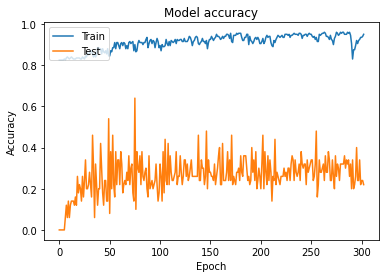

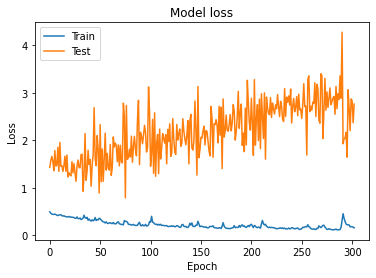

In [13]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Evaluate Model
[Keras Evaluate Model](https://keras.io/models/model/#evaluate)

In [15]:
yee.evaluate(X, Y, batch_size=15, verbose=1, steps=1,workers=10, use_multiprocessing=False)
print('yeeje', X_pre.shape)

1/1 [==============================] - 0s 21ms/step - loss: 2.4714 - accuracy: 0.3333
yeeje (1, 13)


yee

## #Predict
[Keras Predic](https://keras.io/models/model/#predict)

Machine learnt how to diagnose diabetes, now let machine take the doctor's position

In [14]:
#yee.predict(X_pre,  verbose=1, steps=1)
print('yeeje', X_pre.shape)
     #yee.predict(x, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)
yee.predict(X_pre, batch_size=15, verbose=1, steps=1)

#yee.predict(np.array(X_pre))
#print(Y_pre)
#result = yee.predict(X_pre, batch_size=32)
#print(result.shape)



yeeje (1, 13)
1/1 [==============================] - 0s 83ms/step


array([[0.99963117]], dtype=float32)

#Project Reference
[Kaggle -> UCI](https://www.kaggle.com/nozziel/heart-disease-uci-explainable-model-shap/notebook)